In [1]:
from corespray import corespraydf
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import seaborn as sns

from IPython.display import HTML
%matplotlib inline

In [2]:
o=Orbit.from_name('M3')

In [3]:
ts=np.linspace(0,1,1000)
o.integrate(ts,MWPotential2014)
print(o.Tp(),o.Tr())

0.3787798594866931 0.24862258502956833


In [4]:
ro,vo=8.,220.
to=conversion.time_in_Gyr(ro=ro,vo=vo)*1000.


In [5]:
#Globular Cluster NGC 6397
gcname='NGC6397'
mu0=0.
sig0=5.3
vesc0=21.1
logrho0=6.41
rho0=10.0**6.41

mgc=1.0e5
rgc=3.
W0=5.

mmin=0.1
mmax=1.4
alpha=-1

In [6]:
cspray=corespraydf(gcname,MWPotential2014,mu0,sig0,vesc0,rho0,mgc,rgc,W0,mmin,mmax,alpha,verbose=True)

Sample Binary Energies between:  6.911895657493266e+36  and  1.1616160244567497e+40  J


In [7]:
#Sample nstar stars for the distribution function
#Set binary = True if you want to keep track of binary kicks
os=cspray.sample(1000,nstar=100,binaries=True)

In [8]:
#Bindx will tell you what binaries were given kicks that also resulted in escapeing the cluster
cspray.bindx

array([False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False])

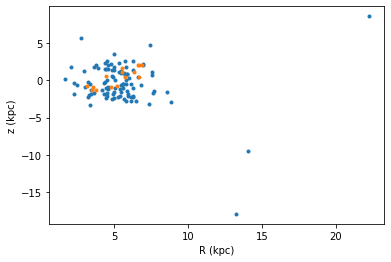

In [9]:
#Plot R and z of escaped stars and binaries
plt.plot(os.R(),os.z(),'.')
plt.plot(cspray.obf.R()[cspray.bindx],cspray.obf.z()[cspray.bindx],'.')

plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')

plt.show()

Text(0, 0.5, 'Escape Velocity (km/s)')

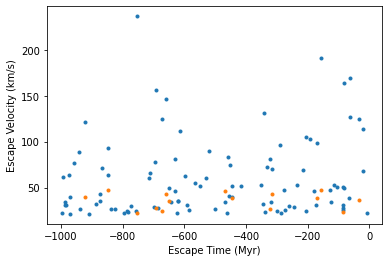

In [10]:
plt.plot(cspray.tesc,cspray.vesc,'.')
plt.plot(cspray.tesc[cspray.bindx],cspray.vescb[cspray.bindx],'.')

plt.xlabel('Escape Time (Myr)')
plt.ylabel('Escape Velocity (km/s)')

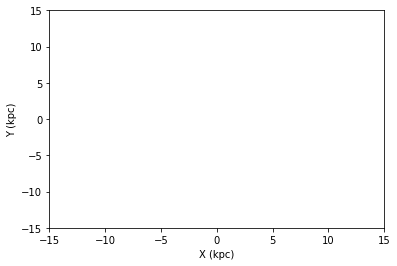

In [11]:
cspray.animate(frames=100,interval=50,xlim=(-15,15),ylim=(-15,15))

In [12]:
HTML(cspray.anim.to_jshtml())


In [13]:
cspray.snapout()

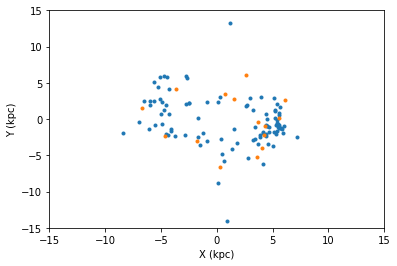

In [14]:
plt.plot(os.x(),os.y(),'.')
plt.plot(cspray.obf.x()[cspray.bindx],cspray.obf.y()[cspray.bindx],'.')

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.show()
plt.close()

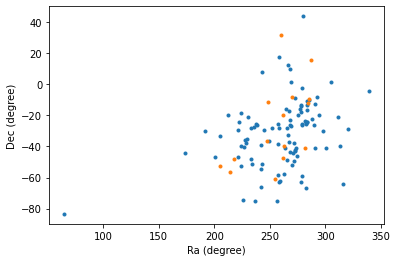

In [15]:
plt.plot(os.ra(),os.dec(),'.')
plt.plot(cspray.obf.ra()[cspray.bindx],cspray.obf.dec()[cspray.bindx],'.')

plt.xlabel('Ra (degree)')
plt.ylabel('Dec (degree)')
plt.show()
plt.close()

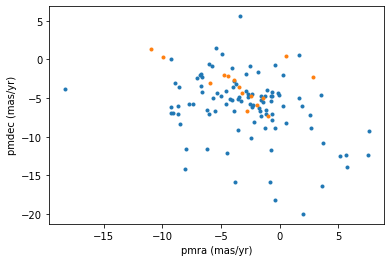

In [16]:
plt.plot(os.pmra(),os.pmdec(),'.')
plt.plot(cspray.obf.pmra()[cspray.bindx],cspray.obf.pmdec()[cspray.bindx],'.')

plt.xlabel('pmra (mas/yr)')
plt.ylabel('pmdec (mas/yr)')
plt.show()
plt.close()

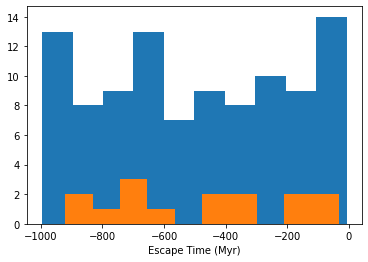

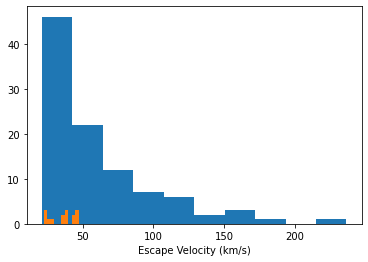

In [17]:
plt.hist(cspray.tesc)
plt.hist(cspray.tesc[cspray.bindx])

plt.xlabel('Escape Time (Myr)')
plt.show()
plt.close()

plt.hist(cspray.vesc)
plt.hist(cspray.vescb[cspray.bindx])
plt.xlabel('Escape Velocity (km/s)')
plt.show()
plt.close()

(0.0, 250.0)

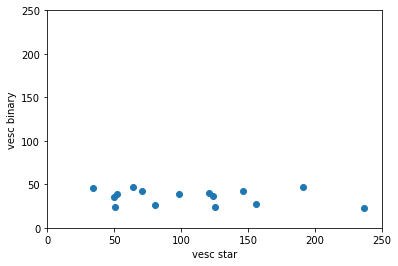

In [50]:
plt.plot(cspray.vesc[cspray.bindx],cspray.vescb[cspray.bindx],'o')
plt.xlabel('vesc star')
plt.ylabel('vesc binary')
plt.xlim(0,250)
plt.ylim(0,250)

In [48]:
((cspray.mb1+cspray.mb2)/cspray.mstar)[cspray.bindx]

array([ 3.02670746,  1.35314303,  2.56854286,  5.62995581,  1.66266791,
        1.35521083,  3.06320938,  5.16691991,  2.15669224,  0.73055373,
        1.38288393, 10.44534362,  3.45401772,  3.3698454 ,  4.05448836])

In [18]:
ts=np.linspace(0,1,1000)
os.integrate(ts,MWPotential2014)

jr,jp,jz=os.jr(),os.jp(),os.jz()


In [19]:
cspray.obf.integrate(ts,MWPotential2014)
jrb,jpb,jzb=cspray.obf.jr(),cspray.obf.jp(),cspray.obf.jz()


In [20]:
vindx=cspray.vesc<1.0e10

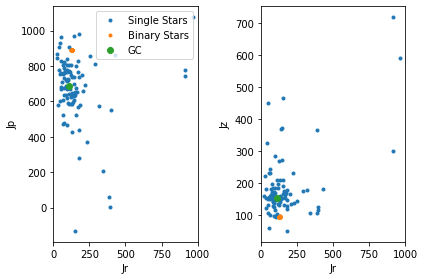

In [21]:
plt.subplot(1,2,1)

plt.plot(jr[vindx],jp[vindx],'.',alpha=1,label='Single Stars')
plt.plot(jrb[cspray.bindx],jpb[cspray.bindx],'.',alpha=1,label='Binary Stars')

plt.plot(cspray.o.jr(),cspray.o.jp(),'o',label='GC')

plt.legend()
plt.xlabel('Jr')
plt.ylabel('Jp')
plt.xlim(0,1000)

plt.subplot(1,2,2)

plt.plot(jr[vindx],jz[vindx],'.',alpha=1)
plt.plot(jrb[cspray.bindx],jzb[cspray.bindx],'.',alpha=1)

plt.plot(cspray.o.jr(),cspray.o.jz(),'o')

plt.xlabel('Jr')
plt.ylabel('Jz')

plt.xlim(0,1000)

plt.tight_layout()

plt.show()
plt.close()

In [22]:
jrb[cspray.bindx]

array([130.99563694, 132.33270816, 125.40879106, 127.83717794,
       127.91415112, 132.75751665, 124.53062576, 132.89695087,
       124.94346313, 129.58608005, 129.56963985, 129.52452212,
       131.33789691, 131.99115398, 128.98373181])

In [31]:
jpb[cspray.bindx]

array([893.05667816, 893.04510865, 893.04808258, 893.07708086,
       893.05970817, 893.06181086, 893.06671425, 893.05896226,
       893.06320895, 893.03341524, 893.06665722, 893.03260998,
       893.05650771, 893.05933328, 893.04475263])

In [33]:
jzb[cspray.bindx]

array([93.9961761 , 94.98967101, 93.40156359, 93.7278415 , 93.76097487,
       93.93285397, 94.43962365, 94.50659875, 93.42193849, 94.54894988,
       94.29842142, 94.11235618, 95.06649048, 94.45997292, 93.66434599])

In [28]:
cspray.obf.vx()[cspray.bindx]

array([  39.83550906,  279.02153006,  -10.49020152, -185.34566083,
         74.42786184, -148.23726828,  138.19224636, -220.70453919,
         -1.36543932,  158.53277255,  -33.29300887,  192.112441  ,
       -102.9900279 , -222.69209805,   91.09817145])

In [29]:
cspray.obf.vy()[cspray.bindx]

array([ 182.15899518,  -26.74583871,  141.26707507,  -32.93866903,
        140.80773449,   -6.36445531,  -58.65471925,  190.12100181,
       -132.53381772,  168.3029049 ,  227.62733463,  -94.42608791,
        249.74096927,  167.05779168,  164.69593812])

In [30]:
cspray.obf.vz()[cspray.bindx]

array([-107.11322126,  -31.16235225,   35.4903347 ,   59.81064878,
        -84.01194213,  -94.03314166,   -4.43627033,  101.88877922,
        -31.05432812,  122.87224524,  -77.25125477,  -81.74607754,
        -26.47594381,   78.71841177,   93.27690914])